In [1]:
import pandas as pd
import matplotlib.pyplot as plt

# Wholesale customers 데이터셋 가져오기 (출처: UCI ML Repository)
uci_path = 'https://archive.ics.uci.edu/ml/machine-learning-databases/\
00292/Wholesale%20customers%20data.csv'
df = pd.read_csv(uci_path, header=0)


In [2]:
df.head()

,Channel,Region,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicassen
0,2,3,12669,9656,7561,214,2674,1338
1,2,3,7057,9810,9568,1762,3293,1776
2,2,3,6353,8808,7684,2405,3516,7844
3,1,3,13265,1196,4221,6404,507,1788
4,2,3,22615,5410,7198,3915,1777,5185


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 440 entries, 0 to 439
Data columns (total 8 columns):
 #   Column            Non-Null Count  Dtype
---  ------            --------------  -----
 0   Channel           440 non-null    int64
 1   Region            440 non-null    int64
 2   Fresh             440 non-null    int64
 3   Milk              440 non-null    int64
 4   Grocery           440 non-null    int64
 5   Frozen            440 non-null    int64
 6   Detergents_Paper  440 non-null    int64
 7   Delicassen        440 non-null    int64
dtypes: int64(8)
memory usage: 27.6 KB


In [4]:
df.describe()

,Channel,Region,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicassen
count,440.000000,440.000000,440.000000,440.000000,440.000000,440.000000,440.000000,440.000000
mean,1.322727,2.543182,12000.297727,5796.265909,7951.277273,3071.931818,2881.493182,1524.870455
std,0.468052,0.774272,12647.328865,7380.377175,9503.162829,4854.673333,4767.854448,2820.105937
min,1.000000,1.000000,3.000000,55.000000,3.000000,25.000000,3.000000,3.000000
25%,1.000000,2.000000,3127.750000,1533.000000,2153.000000,742.250000,256.750000,408.250000
50%,1.000000,3.000000,8504.000000,3627.000000,4755.500000,1526.000000,816.500000,965.500000
75%,2.000000,3.000000,16933.750000,7190.250000,10655.750000,3554.250000,3922.000000,1820.250000
max,2.000000,3.000000,112151.000000,73498.000000,92780.000000,60869.000000,40827.000000,47943.000000


In [5]:
# 분석에 사용할 속성 선택
X = df.iloc[:, :]

from sklearn import preprocessing
X = preprocessing.StandardScaler().fit(X).transform(X)
X[:5]

array([[ 1.44865163,  0.59066829,  0.05293319,  0.52356777, -0.04111489,
        -0.58936716, -0.04356873, -0.06633906],
       [ 1.44865163,  0.59066829, -0.39130197,  0.54445767,  0.17031835,
        -0.27013618,  0.08640684,  0.08915105],
       [ 1.44865163,  0.59066829, -0.44702926,  0.40853771, -0.0281571 ,
        -0.13753572,  0.13323164,  2.24329255],
       [-0.69029709,  0.59066829,  0.10011141, -0.62401993, -0.3929769 ,
         0.6871443 , -0.49858822,  0.09341105],
       [ 1.44865163,  0.59066829,  0.84023948, -0.05239645, -0.07935618,
         0.17385884, -0.23191782,  1.29934689]])

In [6]:
from sklearn import cluster

kmeans = cluster.KMeans(init='k-means++', n_clusters=5, n_init=10)
kmeans.fit(X)

cluster_label = kmeans.labels_
print(cluster_label)
print('\n')

df['Cluster'] = cluster_label
print(df.head())

[0 0 0 1 0 0 0 0 1 0 0 0 0 0 0 1 0 1 0 1 0 1 1 0 0 0 1 1 0 1 1 1 1 1 1 0 1
 0 0 1 1 1 0 0 0 0 0 3 0 0 1 1 0 0 1 1 3 0 1 1 0 3 0 0 1 3 1 0 1 1 1 1 1 0
 0 1 1 0 1 1 1 0 0 1 0 3 3 1 1 1 1 1 3 1 0 1 0 1 1 1 0 0 0 1 1 1 0 0 0 0 1
 0 1 1 1 1 1 1 1 1 1 1 1 0 1 1 1 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 0 1 1
 1 1 1 1 1 1 1 0 0 1 0 0 0 1 1 0 0 0 0 1 1 1 0 0 1 0 1 0 1 1 1 1 1 1 1 4 1
 1 1 1 0 0 1 1 1 0 1 1 2 0 2 2 0 0 2 2 2 0 2 2 2 0 2 3 2 2 0 2 0 2 0 2 2 2
 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 0 2 2 2 2 2 3 2 2 2 2 2 2 2
 2 2 2 2 2 0 2 0 2 0 2 2 2 2 1 1 1 1 1 1 0 1 0 1 1 1 1 1 1 1 1 1 1 1 0 2 0
 2 0 0 2 0 0 0 0 0 0 0 2 2 0 2 2 0 2 2 0 2 2 2 0 2 2 2 2 2 4 2 2 2 2 2 0 2
 3 2 0 2 2 2 2 0 0 1 0 1 1 0 0 1 0 1 0 1 0 1 1 1 0 1 1 1 1 1 1 1 0 1 1 1 1
 1 1 1 0 1 1 0 1 1 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 0 1 1 1 1 1 1 1 1 1 1
 0 0 1 1 1 1 1 1 0 0 1 0 1 1 0 1 0 0 1 1 1 1 1 1 1 1 1 1 1 1 0 1 1]


   Channel  Region  Fresh  Milk  Grocery  Frozen  Detergents_Paper  \
0        2       3  12669  9656    

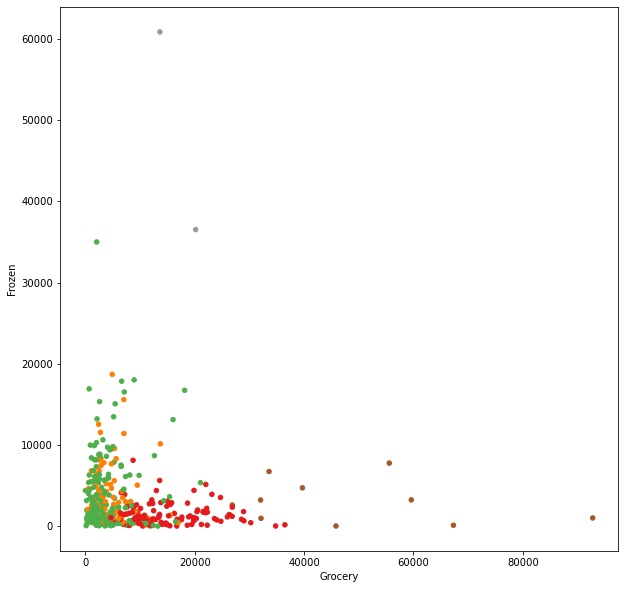

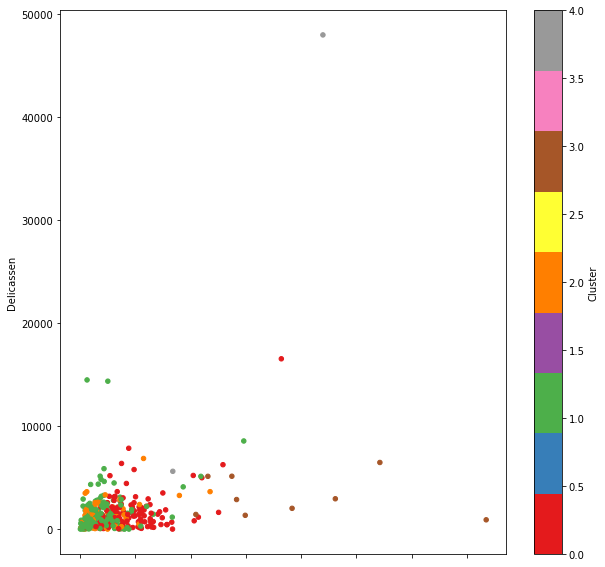

In [7]:
# 그래프로 표현 - 시각화
df.plot(kind='scatter', x='Grocery', y='Frozen', c='Cluster', cmap='Set1', 
        colorbar=False, figsize=(10, 10))
df.plot(kind='scatter', x='Milk', y='Delicassen', c='Cluster', cmap='Set1', 
        colorbar=True, figsize=(10, 10))
plt.show()


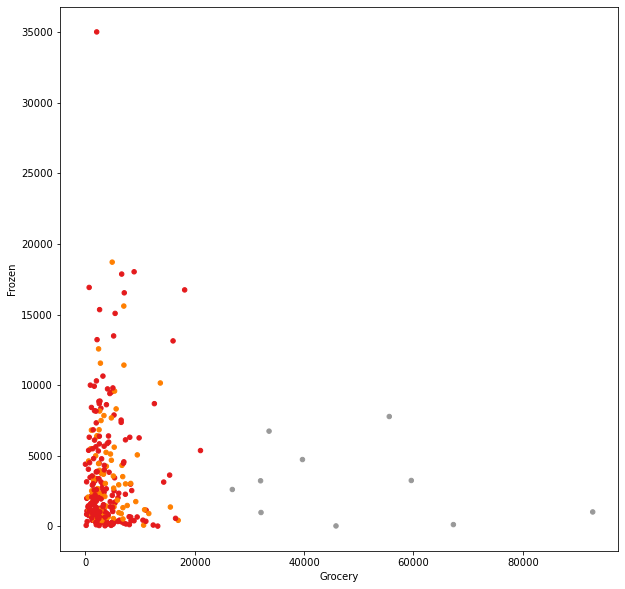

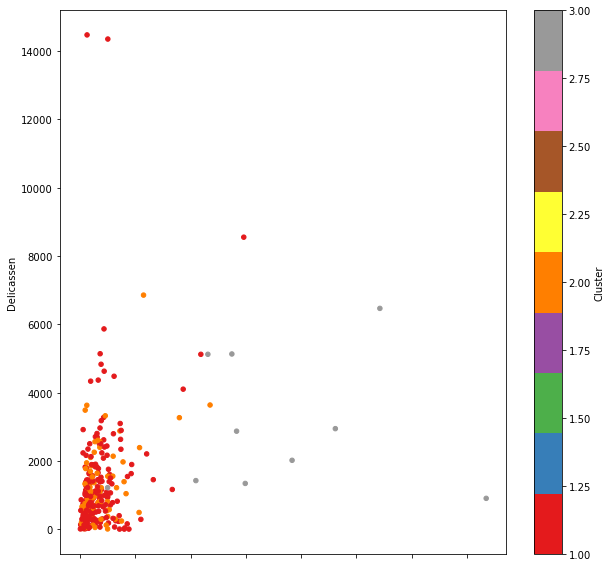

In [9]:
# 큰 값으로 구성된 클러스토 0, 4 제외

mask = (df['Cluster'] == 0) | (df['Cluster'] == 4)
ndf = df[-mask]

ndf.plot(kind='scatter', x='Grocery', y='Frozen', c='Cluster', cmap='Set1', 
        colorbar=False, figsize=(10, 10))
ndf.plot(kind='scatter', x='Milk', y='Delicassen', c='Cluster', cmap='Set1', 
        colorbar=True, figsize=(10, 10))
plt.show()